In [1]:
#what is bankruptacy?
#when someone (or a company) is unable to repay their debts, they can file for bankruptcy. 
#This gives them a fresh start by either reducing or eliminating their debts. However, it may involve selling assets or restructuring how the debt is paid.
#Ex:Toys "R" Us (2017):
#What Happened: Toys "R" Us, a popular toy store chain, filed for bankruptcy because it had accumulated too much debt and couldn't compete with online retailers like Amazon.
#Result: The company closed many of its stores and had to restructure its operations.

#load the dataset
import pandas as pd
import numpy as np
data=pd.read_excel("Bankruptcy.xlsx")

In [6]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [2]:
data.shape

(250, 7)

In [3]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [9]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#check for missing values
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [11]:
#check data types
data.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

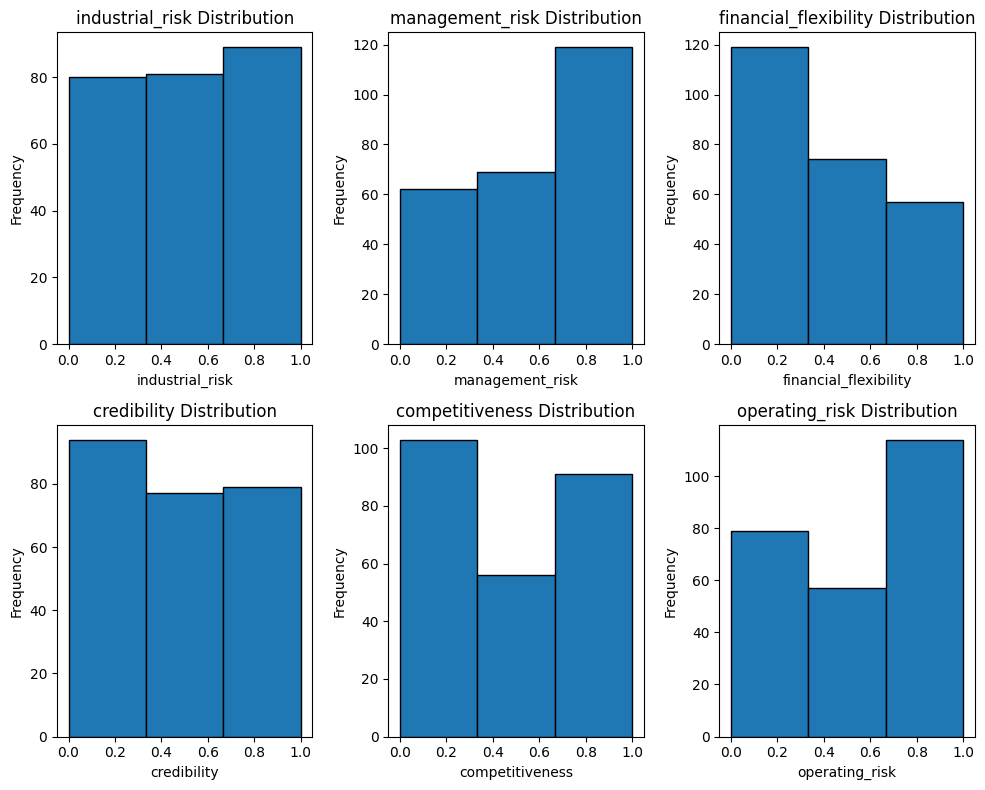

In [12]:
#Histogram plot
import matplotlib.pyplot as plt
import seaborn as sns
features = ['industrial_risk', 'management_risk', 'financial_flexibility', 
            'credibility', 'competitiveness', 'operating_risk']

# Set up the plot
plt.figure(figsize=(10, 8))

# Loop through each feature and plot the histogram
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i) 
    plt.hist(data[feature], bins=3, edgecolor='black')  
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

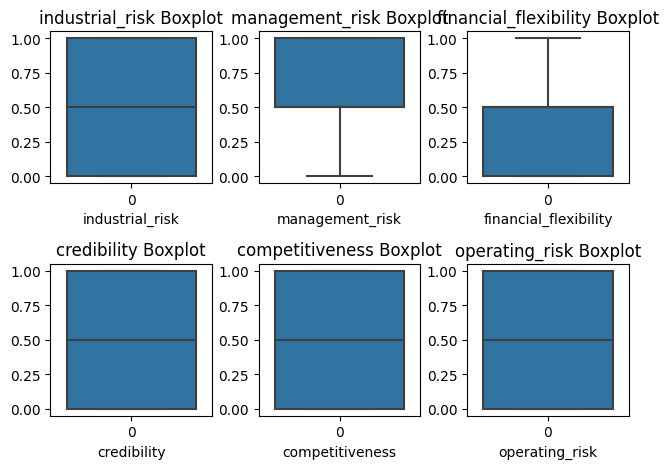

In [13]:
#Box plot:A boxplot is useful for visualizing the distribution of data and identifying outliers. 
# Loop through each feature and plot the boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(data=data[feature])
    plt.title(f'{feature} Boxplot')
    plt.xlabel(feature)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

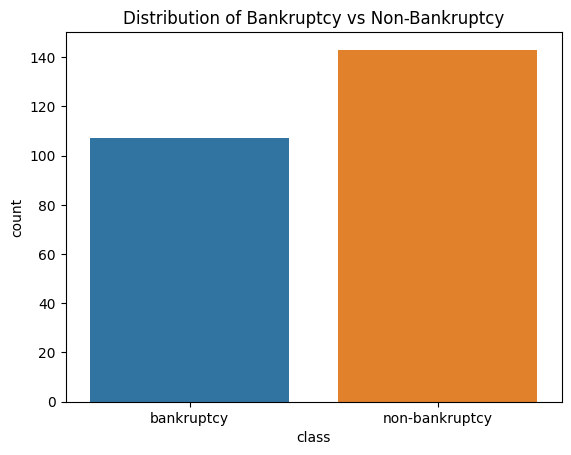

In [14]:
# Countplot
sns.countplot(x="class", data=data)
plt.title("Distribution of Bankruptcy vs Non-Bankruptcy")
plt.show()

In [15]:
class_counts = data['class'].value_counts()
# Print the counts
print(class_counts)

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64


In [16]:
#The plot contains two bars (since class is a binary variable, with values 0 and 1):
#One bar will represent the number of non-bankrupt companies (where class = 0).
#The other bar will represent the number of bankrupt companies (where class = 1).

#In this case Non bankruptacy is higher than bankruptacy it means that more companies in the dataset did not go bankrupt.

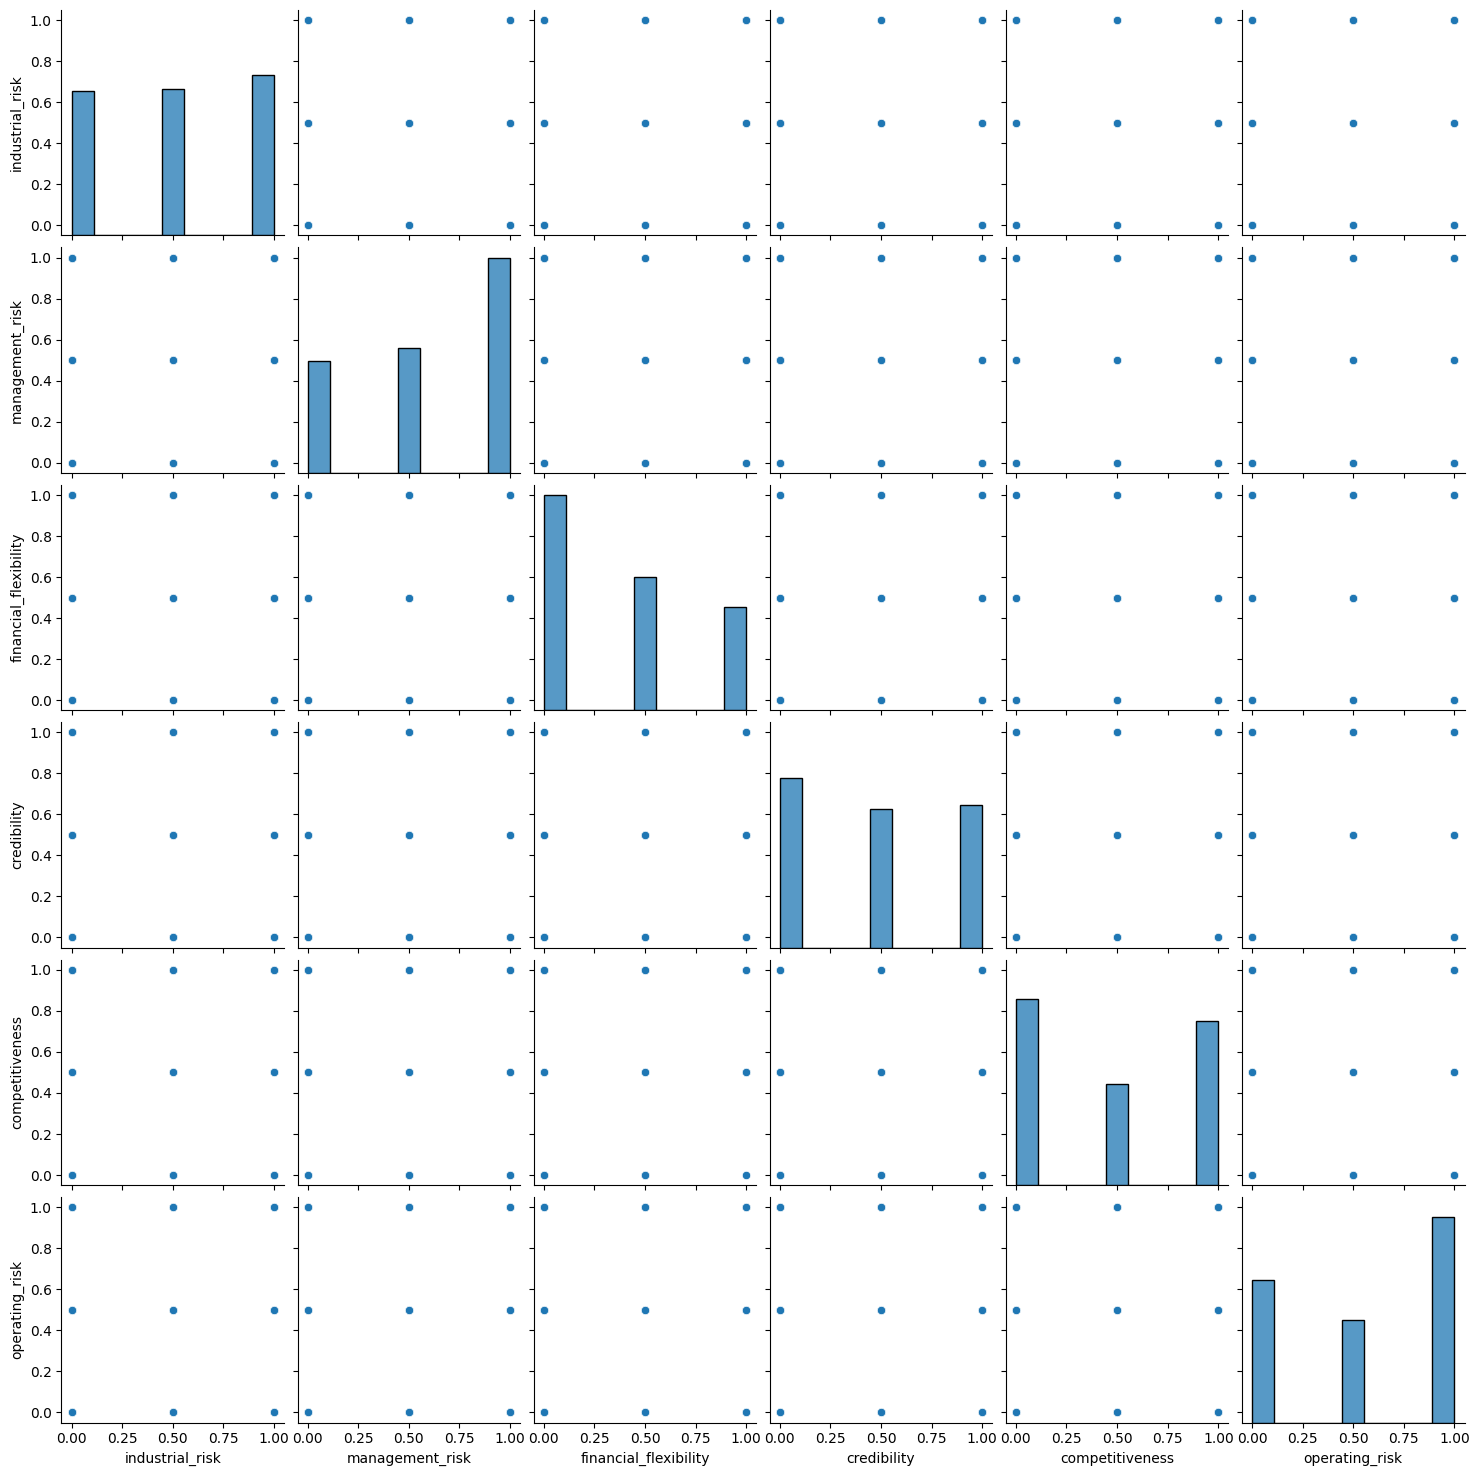

In [17]:
# Pair plot to explore feature relationships
sns.pairplot(data)
plt.show()

In [18]:
numeric_data = data.select_dtypes(include=['number'])

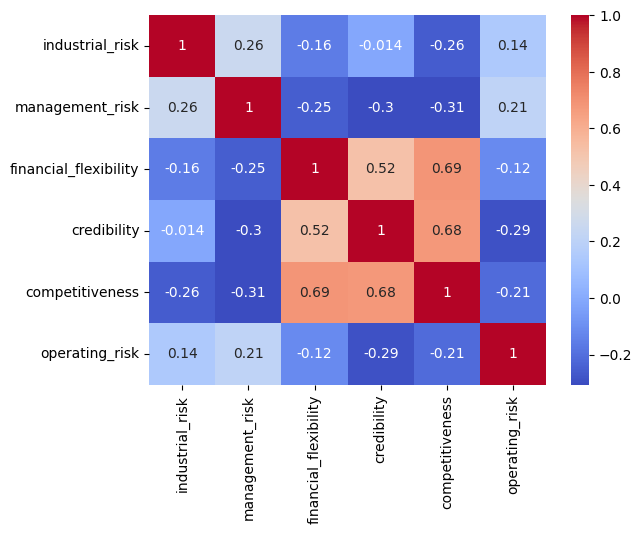

In [19]:
# Correlation matrix to analyze relationships between features
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [20]:
#Red colors indicate strong positive correlations (close to 1), meaning that as one feature increases, the other increases too.
#Blue colors indicate strong negative correlations (close to -1), meaning that as one feature increases, the other decreases.
#White or near-zero color indicates weak or no correlation (close to 0), meaning there is little to no linear relationship between the features.

#The diagonal of the heatmap shows a correlation of 1, as each feature is perfectly correlated with itself.


Model Building:
Splitting Data: Split data into training and testing sets.
Model Selection: Choose an appropriate classification algorithm

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
#feature scaling: standardizing the features
scaler=StandardScaler()
scaled_features=scaler.fit_transform(data.drop(columns='class'))
#convert the scaled featutes back to DataFrame
scaled_data=pd.DataFrame(scaled_features, columns=data.columns[:-1])
#add the target variable back
scaled_data['class']=data['class']
#display the scaled result
print(scaled_data.head())

   industrial_risk  management_risk  financial_flexibility  credibility  \
0        -0.043827         0.941732              -0.938172    -1.132941   
1        -1.261256         0.941732              -0.938172    -1.132941   
2         1.173601        -1.497989              -0.938172    -1.132941   
3        -0.043827        -1.497989              -0.938172     0.072315   
4         1.173601         0.941732              -0.938172    -1.132941   

   competitiveness  operating_risk       class  
0         -1.08231       -0.161400  bankruptcy  
1         -1.08231        0.991457  bankruptcy  
2         -1.08231        0.991457  bankruptcy  
3         -1.08231        0.991457  bankruptcy  
4         -1.08231        0.991457  bankruptcy  


industrial_risk: This represents the level of risk in the business industry.

The values are scaled between -1 and 1, indicating different risk levels.
A value close to 1 indicates high risk.
A value close to -1 indicates low risk.
A value around 0 suggests a medium level of risk.
in all case, Positive values represent higher risk, and negative values represent lower risk.

For example: industrial_risk = -0.043827
management_risk = 0.941732
financial_flexibility = -0.938172
credibility = -1.132941
competitiveness = -1.08231
operating_risk = -0.161400
class = bank

This row represents a company with low industrial risk (-0.043827), but it has a high management risk (0.941732) and very low financial flexibility (-0.938172). The company is also not credible (-1.132941) and has low competitiveness (-1.08231). The operating risk is relatively low (-0.161400). This company went bankrupt according to the class label.ruptcy

In [23]:
#splitting data into training and testing sets
#befpre training the model we need to split the data into a training set and a testing set.

#split data into features(x) and target(y)
X=scaled_data.drop(columns='class')
y=scaled_data['class']

In [24]:
#split the data into training(80%) & tetsing set(20%)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
print(f"Training data size: {X_train.shape}")
print(f"Tetsing data size: {X_test.shape}")

Training data size: (200, 6)
Tetsing data size: (50, 6)


X_train: This is the data that the model will use to learn the patterns. The shape of X_train tells us how many samples (or rows) and how many features (or columns) we have in the training set.
X_test: This is the data we will use to test the model's performance. The shape of X_test tells us how many samples and features we have in the testing set.

Training data size: (200, 6)-----> 200 rows 6 columns
Tetsing data size: (50, 6-----> 50 rows 6 columns)

In [26]:
#Model building and training
#in this step we train different classification models, such as logistic regression, decision trees and radom forest to predict bankruptacy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [27]:
#intialize the models
log_reg=LogisticRegression()
dt=DecisionTreeClassifier(random_state=42)
rf=RandomForestClassifier(random_state=42)
#by setting a random_state (e.g., random_state=42), 
#every time you run the model, it will follow the same path in building the tree, ensuring that your results are consistent.

In [28]:
#train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Convert y_test to numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg_numeric = label_encoder.fit_transform(y_pred_log_reg)
y_test_numeric = label_encoder.fit_transform(y_test)

In [30]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
#make predictions
y_pred_log_reg=log_reg.predict(X_test)
y_pred_dt=dt.predict(X_test)
y_pred_rf=rf.predict(X_test)

In [33]:
# Evaluate the model
print("Logistic Regression Evaluation:")
print(classification_report(y_test_numeric, y_pred_log_reg_numeric))
print(confusion_matrix(y_test_numeric, y_pred_log_reg_numeric))
y_pred_log_reg_prob = log_reg.predict_proba(X_test)[:, 1]
print(f"ROC-AUC: {roc_auc_score(y_test_numeric, y_pred_log_reg_prob)}\n")

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[21  0]
 [ 0 29]]
ROC-AUC: 0.9999999999999999



a. Precision:
Precision for class 0 (non-bankruptcy) = 1.00: This means that when the model predicted non-bankruptcy, it was correct 100% of the time.
Precision for class 1 (bankruptcy) = 1.00: This means that when the model predicted bankruptcy, it was correct 100% of the time.

b. Recall:
Recall for class 0 (non-bankruptcy) = 1.00: This means that the model correctly identified all the non-bankrupt companies.
Recall for class 1 (bankruptcy) = 1.00: This means that the model correctly identified all the bankrupt companies.

c. F1-Score:
F1-score for both classes = 1.00: The F1-score is the harmonic mean of precision and recall. Since both precision and recall are 1.00 for both classes, the F1-score is also perfect (1.00), indicating a great balance between precision and recall.

Confusion matrix:
[[21  0]   21 non-bankrupt companies correctly classified, 0 misclassified as bankrupt
 [ 0 29]] # 29 bankrupt companies correctly classified, 0 misclassified as non-bankrup

 The ROC-AUC score of 1.00 is the best possible score, indicating that the model is perfectly classifying both bankruptcy and non-bankruptcy companies and has no confusion between the two classes.t

In [34]:
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_dt_numeric = label_encoder.transform(y_pred_dt) 
y_pred_rf_numeric = label_encoder.transform(y_pred_rf) 

In [35]:
print("Decision Tree Evaluation:")
print(classification_report(y_test_numeric, y_pred_dt_numeric))
print(confusion_matrix(y_test_numeric, y_pred_dt_numeric))
print(f"ROC-AUC: {roc_auc_score(y_test_numeric, y_pred_dt_numeric)}\n")

Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[21  0]
 [ 1 28]]
ROC-AUC: 0.9827586206896552



The Decision Tree model performs very well, achieving 98% accuracy, with strong precision, recall, and F1-scores for both classes (bankruptcy and non-bankruptcy).

confusion matrix: 
[[21  0]     --> 21 correct non-bankruptcy predictions (0)
 [ 1 28]]    --> 1 incorrect bankruptcy prediction (0 predicted as bankruptcy) and 28 correct bankruptcy predictions (1
 There’s a small error: 1 case of bankruptcy was misclassified as non-bankruptcy, but overall, the model is very good

The ROC-AUC score of 0.98 indicates the model's excellent ability to differentiate between bankrupt and non-bankrupt companies..

In [36]:
print("Random Forest Evaluation:")
print(classification_report(y_test_numeric, y_pred_rf_numeric))
print(confusion_matrix(y_test_numeric, y_pred_rf_numeric))
print(f"ROC-AUC: {roc_auc_score(y_test_numeric, y_pred_rf_numeric)}\n")

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[21  0]
 [ 0 29]]
ROC-AUC: 1.0



The Random Forest model performed perfectly, achieving 100% accuracy, with 1.00 precision, 1.00 recall, and 1.00 F1-scores for both classes (bankruptcy and non-bankruptcy).

The ROC-AUC score of 1.0 confirms that the model perfectly discriminates between bankrupt and non-bankrupt companies.

The confusion matrix shows that all the predictions were correct (no false positives or false negatives).

This indicates that the Random Forest model is extremely reliable for predicting bankruptcy in this dataset. It is able to classify every instance accurately, making it a highly effective model for this task.

In [37]:
import pickle
from sklearn.ensemble import RandomForestClassifier


In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
with open("bankruptcy_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [40]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import streamlit as st
import pickle
import numpy as np


In [42]:
with open("bankruptcy_model.pkl", "rb") as file:
    model = pickle.load(file)

In [43]:
st.title("Bankruptcy Prediction App")

2025-04-02 14:52:13.758 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52:15.239 
  command:

    streamlit run C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-02 14:52:15.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [44]:
st.write("Enter the company's financial details to predict bankruptcy risk.")

2025-04-02 14:52:32.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52:32.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52:32.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52:32.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [45]:
industrial_risk = st.selectbox("Industrial Risk", [0, 0.5, 1])
management_risk = st.selectbox("Management Risk", [0, 0.5, 1])
financial_flexibility = st.selectbox("Financial Flexibility", [0, 0.5, 1])
credibility = st.selectbox("Credibility", [0, 0.5, 1])
competitiveness = st.selectbox("Competitiveness", [0, 0.5, 1])
operating_risk = st.selectbox("Operating Risk", [0, 0.5, 1])


2025-04-02 14:52:43.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52:43.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52:43.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52:43.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52:43.331 Session state does not function when running a script without `streamlit run`
2025-04-02 14:52:43.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52:43.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52:43.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:52

In [48]:
if st.button("Predict"):
    features = np.array([[industrial_risk, management_risk, financial_flexibility, credibility, competitiveness, operating_risk]])
    prediction = model.predict(features)

    # Output result
    result = "Bankrupt" if prediction[0] == 1 else "Non-Bankrupt"
    st.write(f"### Prediction: {result}")

2025-04-02 14:53:59.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:53:59.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:53:59.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:53:59.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 14:53:59.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
